In [1]:
import matplotlib.pyplot as plt

from network import Network
from activations import *
from losses import *
from regularizers import *
from utils import read_monk, Range_random
from metrics import Accuracy

# Testing Monk's Problems

## Monk 1

In [2]:
X_train, X_test, y_train, y_test = read_monk(train_path='../data/monk/monks-1.train', test_path='../data/monk/monks-1.test')

In [3]:
np.random.seed(6)
net = Network(MSE(1), eta=1e-1)

net.add_layer(
    input_size=len(X_train[0]),
    units_size=3,
    starting=Range_random(),
    activation=ReLU(),
    regularizer=L2(lambda_=1e-6),
    momentum=('Standard', 0.99)
)

net.add_layer(
    input_size=3,
    units_size=1,
    starting=Range_random(),
    activation=Sigmoid(),
    regularizer=L2(lambda_=1e-6),
    momentum=('Standard', 0.99)
)

In [4]:
statistics = net.train(
    X_train=X_train,
    y_train=y_train,
    X_val=X_test,
    y_val=y_test,
    epochs=1000,
    patience=50,
    metric=Accuracy()
)

Epochs:  59%|█████▉    | 591/1000 [00:08<00:05, 68.64it/s]


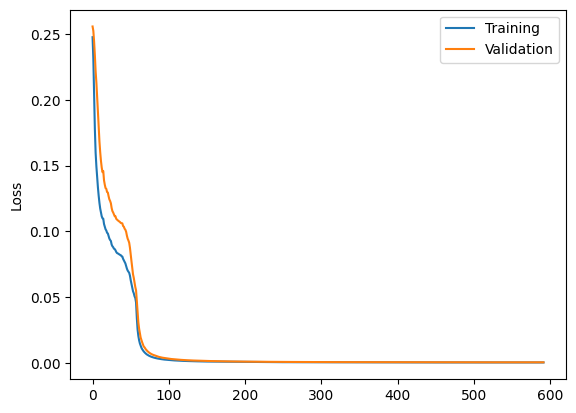

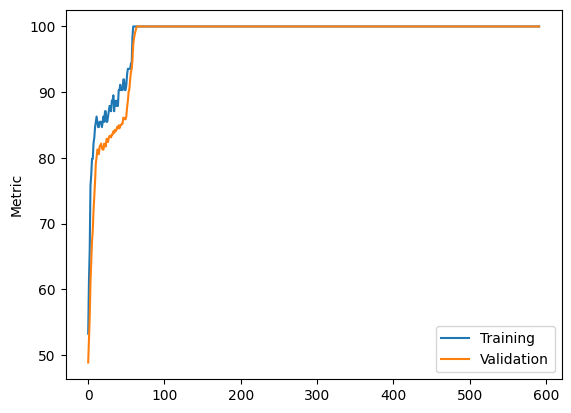

In [5]:
plt.plot(statistics['tr_losses'], label='Training')
plt.plot(statistics['val_losses'], label='Validation')
plt.legend()
plt.ylabel('Loss')
plt.show()

plt.plot(statistics['tr_metrics'], label='Training')
plt.plot(statistics['val_metrics'], label='Validation')
plt.legend()
plt.ylabel('Metric')
plt.show()

In [6]:
print(net.statistics(X_test, y_test, Accuracy()))

(0.00046112532209280176, 100.0)


## Monk 2

In [7]:
X_train, X_test, y_train, y_test = read_monk(train_path='../data/monk/monks-2.train', test_path='../data/monk/monks-2.test')

In [8]:
np.random.seed(6)
net = Network(MSE(1), eta=1e-1)

net.add_layer(
    input_size=len(X_train[0]),
    units_size=3,
    starting=Range_random(),
    activation=ReLU(),
    regularizer=L2(lambda_=1e-6),
    momentum=('Standard', 0.99)
)

net.add_layer(
    input_size=3,
    units_size=1,
    starting=Range_random(),
    activation=Sigmoid(),
    regularizer=L2(lambda_=1e-6),
    momentum=('Standard', 0.99)
)

In [9]:
statistics = net.train(
    X_train=X_train,
    y_train=y_train,
    X_val=X_test,
    y_val=y_test,
    epochs=1000,
    patience=50,
    metric=Accuracy()
)

Epochs:  38%|███▊      | 375/1000 [00:06<00:11, 55.23it/s]


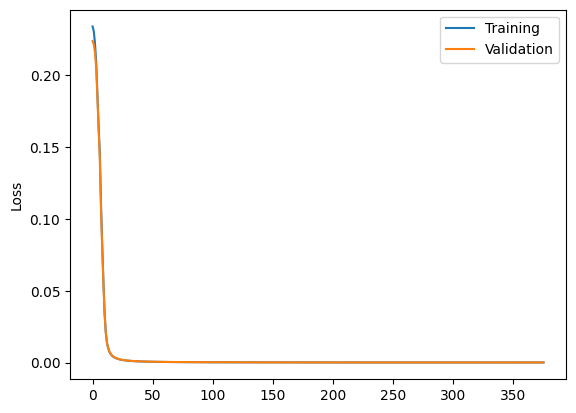

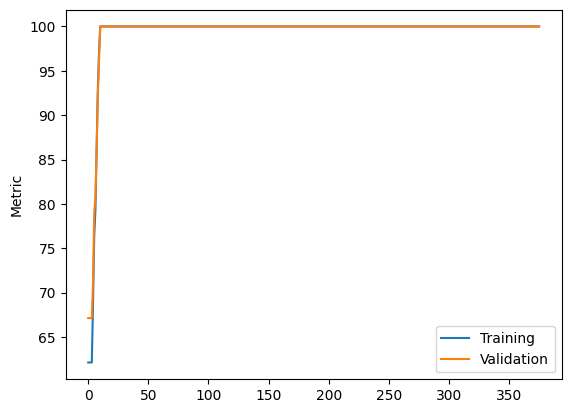

In [10]:
plt.plot(statistics['tr_losses'], label='Training')
plt.plot(statistics['val_losses'], label='Validation')
plt.legend()
plt.ylabel('Loss')
plt.show()

plt.plot(statistics['tr_metrics'], label='Training')
plt.plot(statistics['val_metrics'], label='Validation')
plt.legend()
plt.ylabel('Metric')
plt.show()

In [11]:
print(net.statistics(X_test, y_test, Accuracy()))

(0.00014074765826714821, 100.0)


## Monk 3

In [12]:
X_train, X_test, y_train, y_test = read_monk(train_path='../data/monk/monks-3.train', test_path='../data/monk/monks-3.test')

In [13]:
np.random.seed(6)
net = Network(MSE(1), eta=1e-1)

net.add_layer(
    input_size=len(X_train[0]),
    units_size=3,
    starting=Range_random(),
    activation=ReLU(),
    regularizer=L2(lambda_=1e-6),
    momentum=('Standard', 0.99)
)

net.add_layer(
    input_size=3,
    units_size=1,
    starting=Range_random(),
    activation=Sigmoid(),
    regularizer=L2(lambda_=1e-6),
    momentum=('Standard', 0.99)
)

In [14]:
statistics = net.train(
    X_train=X_train,
    y_train=y_train,
    X_val=X_test,
    y_val=y_test,
    epochs=1000,
    patience=50,
    metric=Accuracy()
)

Epochs:   7%|▋         | 66/1000 [00:00<00:13, 66.75it/s]


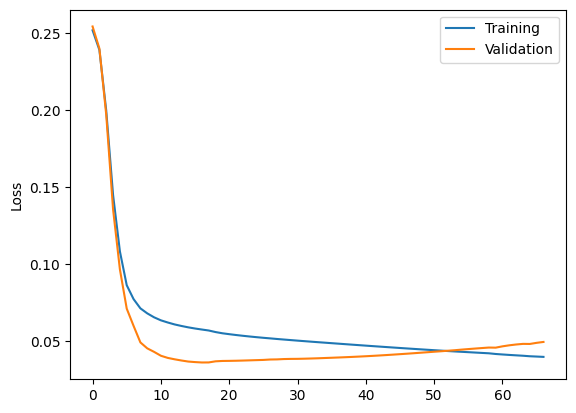

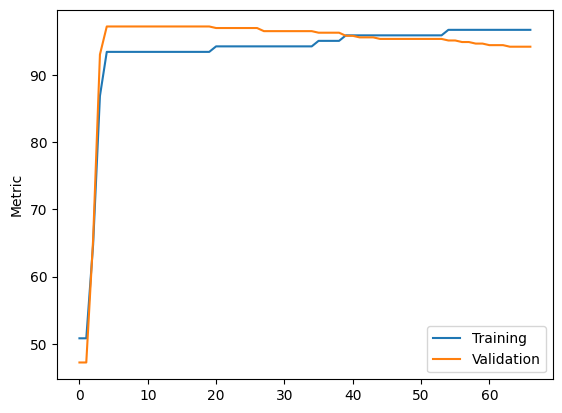

In [15]:
plt.plot(statistics['tr_losses'], label='Training')
plt.plot(statistics['val_losses'], label='Validation')
plt.legend()
plt.ylabel('Loss')
plt.show()

plt.plot(statistics['tr_metrics'], label='Training')
plt.plot(statistics['val_metrics'], label='Validation')
plt.legend()
plt.ylabel('Metric')
plt.show()

In [16]:
print(net.statistics(X_test, y_test, Accuracy()))

(0.036376643810427996, 97.22222222222221)
